![alt text](Isolated.png "Title")

# Example 1 : Micro-Grid Prosumer Cost/Payment Problem

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

def get_universe_fuzzy():
    # Generate universe variables
    # * All are from 0 to 100 percent ranges for each unit
    # Membership Functions
    x_demand = np.arange(0, 100, 10)
    x_generation = np.arange(0, 100, 10)
    x_cost = np.arange(0, 100, 10)
    x_price = np.arange(0, 100, 10)

    # Generate fuzzy membership functions
    return {
        "demand" :{
            "lo":fuzz.trimf(x_demand, [0, 0, 50]),
            "md":fuzz.trimf(x_demand, [0, 50, 100]),
            "hi":fuzz.trimf(x_demand, [50, 100, 100]),
            "range" : x_demand,
            "title" : "Consumer Demand"
        },
        'generation':{
            "lo":fuzz.trimf(x_generation, [0, 0, 50]),
            "md":fuzz.trimf(x_generation, [0, 50, 100]),
            "hi":fuzz.trimf(x_generation, [50, 100, 100]),
            "range" : x_generation,
            "title" : "Prosumer Generation"
        },
        "cost" :{
            "lo":fuzz.trimf(x_cost, [0, 0, 50]),
            "md":fuzz.trimf(x_cost, [0, 50, 100]),
            "hi":fuzz.trimf(x_cost, [50, 100, 100]),
            "range" : x_cost,
            "title" : "Consumer Cost of Energy"
        },
        "price":{
            "lo":fuzz.trimf(x_price, [0, 0, 50]),
            "md":fuzz.trimf(x_price, [0, 50, 100]),
            "hi":fuzz.trimf(x_price, [50, 100, 100]),
            "range" : x_price,
            "title" : "Prosumer Payment for Energy"
        }
    }

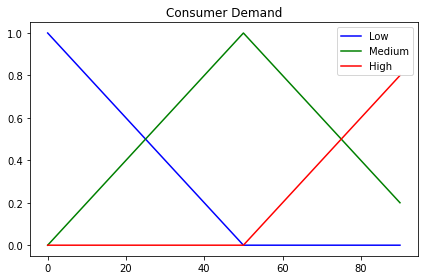

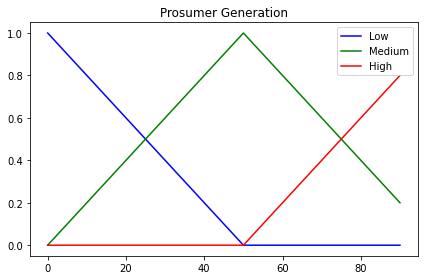

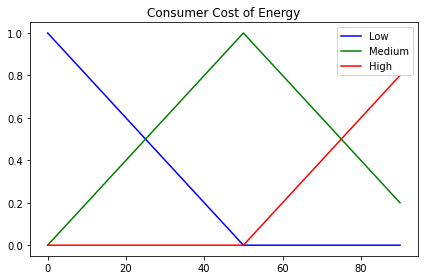

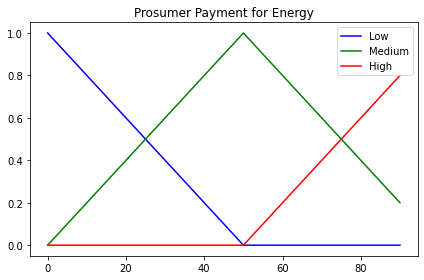

In [4]:
# Visualize the membership functions
axN = []
uni=get_universe_fuzzy()
for _ in uni.keys():
    plt.plot(uni[_]['range'], uni[_]['lo'], 'b', linewidth=1.5, label='Low')
    plt.plot(uni[_]['range'], uni[_]['md'], 'g', linewidth=1.5, label='Medium')
    plt.plot(uni[_]['range'], uni[_]['hi'], 'r', linewidth=1.5, label='High')
    plt.title(uni[_]['title'])
    plt.legend()
    plt.tight_layout()
    plt.show()


# Memebership Rules

Rules for Cost of Energy to Consumers:

1. **IF** generation **IS** low **AND** demand **IS** low **THEN** cost **IS** med
2. **IF** generation **IS** high **AND** demand **IS** low **THEN** cost **IS** low
3. **IF** generation **IS** high **AND** demand **IS** high **THEN** cost **IS** low
4. **IF** generation **IS** low **AND** demand **IS** high **THEN** cost **IS** high

Rules for Price of Energy for Prosumers:

1. **IF** generation **IS** low **AND** demand **IS** low **THEN** price **IS** low
2. **IF** generation **IS** high **AND** demand **IS** low **THEN** price **IS** low
3. **IF** generation **IS** high **AND** demand **IS** high **THEN** price **IS** med
4. **IF** generation **IS** low **AND** demand **IS** high **THEN** price **IS** high


In [5]:
def get_fuzzy_cost(universe,generation_val,demand_val):
    uni_gen = universe['generation']
    uni_dem = universe['demand']
    uni_cost = universe['cost']
    generation_level = {
        'lo': fuzz.interp_membership(uni_gen['range'], uni_gen['lo'], generation_val),
        'md': fuzz.interp_membership(uni_gen['range'], uni_gen['md'], generation_val),
        'hi': fuzz.interp_membership(uni_gen['range'], uni_gen['hi'], generation_val)
    }
    demand_level = {
        'lo': fuzz.interp_membership(uni_dem['range'], uni_dem['lo'], demand_val),
        'md': fuzz.interp_membership(uni_dem['range'], uni_dem['md'], demand_val),
        'hi': fuzz.interp_membership(uni_dem['range'], uni_dem['hi'], demand_val)
    }
    # Rule #1
    # IF generation IS low AND demand IS low THEN cost IS med
    activation_rule1 = np.multiply(generation_level['lo'], demand_level['lo'])
    cost_activation_md = np.fmin(activation_rule1, uni_cost['md'])
    # Rule #2
    #IF generation IS high AND demand IS low THEN cost IS low
    activation_rule2 = np.multiply(generation_level['hi'], demand_level['lo'])
    cost_activation_lo = np.fmin(activation_rule2, uni_cost['lo'])
    # Rule #3
    #IF generation IS high AND demand IS high THEN cost IS low
    activation_rule3 = np.multiply(generation_level['hi'], demand_level['hi'])
    cost_activation_lo = np.fmin(activation_rule3, uni_cost['lo'])
    # Rule #4
    #IF generation IS low AND demand IS high THEN cost IS high
    activation_rule4 = np.multiply(generation_level['lo'], demand_level['hi'])
    cost_activation_hi = np.fmin(activation_rule4, uni_cost['hi'])

    cost0 = np.zeros_like(uni_cost['range'])
    # Visualize this
    fig, ax0 = plt.subplots(figsize=(8, 3))
    ax0.fill_between(uni_cost['range'], cost0, cost_activation_lo, facecolor='b', alpha=0.7)
    ax0.plot(uni_cost['range'], uni_cost['lo'], 'b', linewidth=0.5, linestyle='--', )
    ax0.fill_between(uni_cost['range'], cost0, cost_activation_md, facecolor='g', alpha=0.7)
    ax0.plot(uni_cost['range'], uni_cost['md'], 'g', linewidth=0.5, linestyle='--')
    ax0.fill_between(uni_cost['range'], cost0, cost_activation_hi, facecolor='r', alpha=0.7)
    ax0.plot(uni_cost['range'], uni_cost['hi'], 'r', linewidth=0.5, linestyle='--')
    ax0.set_title('Cost Output membership activity')
    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
    plt.tight_layout()



In [6]:
def get_fuzzy_price(universe,generation_val,demand_val):
    uni_gen = universe['generation']
    uni_dem = universe['demand']
    uni_price = universe['price']
    generation_level = {
        'lo': fuzz.interp_membership(uni_gen['range'], uni_gen['lo'], generation_val),
        'md': fuzz.interp_membership(uni_gen['range'], uni_gen['md'], generation_val),
        'hi': fuzz.interp_membership(uni_gen['range'], uni_gen['hi'], generation_val)
    }
    demand_level = {
        'lo': fuzz.interp_membership(uni_dem['range'], uni_dem['lo'], demand_val),
        'md': fuzz.interp_membership(uni_dem['range'], uni_dem['md'], demand_val),
        'hi': fuzz.interp_membership(uni_dem['range'], uni_dem['hi'], demand_val)
    }

    # Rule #1
    # IF generation IS low AND demand IS low THEN price IS low
    activation_rule1 = np.multiply(generation_level['lo'], demand_level['lo'])
    price_activation_lo = np.fmin(activation_rule1, uni_price['lo'])
    # Rule #2
    # IF generation IS high AND demand IS low THEN price IS low
    activation_rule2 = np.multiply(generation_level['hi'], demand_level['lo'])
    price_activation_lo = np.fmin(activation_rule2, uni_price['lo'])
    # Rule #3
    # IF generation IS high AND demand IS high THEN price IS md
    activation_rule3 = np.multiply(generation_level['hi'], demand_level['hi'])
    price_activation_md = np.fmin(activation_rule3, uni_price['md'])
    # Rule #4
    # IF generation IS low AND demand IS high THEN price IS high
    activation_rule4 = np.multiply(generation_level['lo'], demand_level['hi'])
    price_activation_hi = np.fmin(activation_rule4, uni_price['hi'])

    price0 = np.zeros_like(uni_price['range'])
    # Visualize this
    fig, ax0 = plt.subplots(figsize=(8, 3))
    ax0.fill_between(uni_price['range'], price0, price_activation_lo, facecolor='b', alpha=0.7)
    ax0.plot(uni_price['range'], uni_price['lo'], 'b', linewidth=0.5, linestyle='--', )
    ax0.fill_between(uni_price['range'], price0, price_activation_md, facecolor='g', alpha=0.7)
    ax0.plot(uni_price['range'], uni_price['md'], 'g', linewidth=0.5, linestyle='--')
    ax0.fill_between(uni_price['range'], price0, price_activation_hi, facecolor='r', alpha=0.7)
    ax0.plot(uni_price['range'], uni_price['hi'], 'r', linewidth=0.5, linestyle='--')
    ax0.set_title('Price Output membership activity')
    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
    plt.tight_layout()

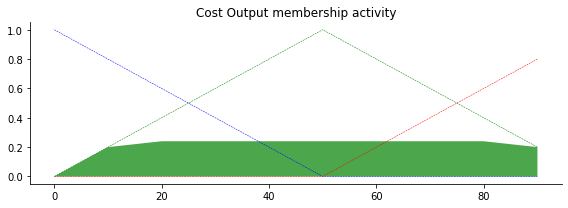

In [7]:
cost = get_fuzzy_cost(universe=get_universe_fuzzy(),generation_val= 20,demand_val = 30)
print(cost)

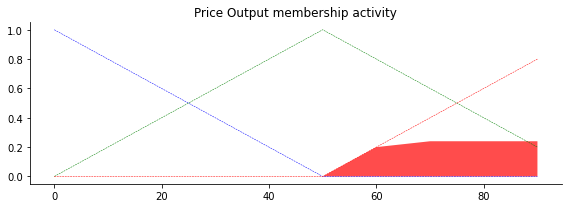

In [13]:

price = get_fuzzy_price(universe=get_universe_fuzzy(),generation_val= 30,demand_val = 80)
print(price)

# Example 2 : Micro-Grid Prosumer Cost/Payment Problem
In this example we are going to determine two fuzzy outputs. The rules for determining the payment of a prosumers generation into a electrical grid connected network. We will use percentages for the production , demand and cost/price units.

## Micro-grid Prosumer Problem — Consumer Demand, and Prosumer Generation Factors

Rules for Cost of Energy to Consumers:

1. **IF** generation **IS** low **AND** demand **IS** low **THEN** cost **IS** med
2. **IF** generation **IS** high **AND** demand **IS** low **THEN** cost **IS** low
3. **IF** generation **IS** high **AND** demand **IS** high **THEN** cost **IS** low
4. **IF** generation **IS** low **AND** demand **IS** high **THEN** cost **IS** high

Rules for Price of Energy for Prosumers:

1. **IF** generation **IS** low **AND** demand **IS** low **THEN** price **IS** low
2. **IF** generation **IS** high **AND** demand **IS** low **THEN** price **IS** low
3. **IF** generation **IS** high **AND** demand **IS** high **THEN** price **IS** med
4. **IF** generation **IS** low **AND** demand **IS** high **THEN** price **IS** high


For this system we have two input/output universe variables: demand and generation / price and cost



In [9]:
%pylab inline
import numpy as np
import skfuzzy as fuzz
pylab.rcParams['figure.figsize'] = (10.0, 5.0)

Populating the interactive namespace from numpy and matplotlib


### Step 1: Fuzzify Inputs / Output Variables

In [10]:
########## INPUTS ########################
#Input Universe functions
generation = np.arange(0,11,.1)
demand    = np.arange(0,11,.1)
# Input Membership Functions
# Generation
generation_lo = fuzz.gaussmf(generation ,0,1.5)
generation_md = fuzz.gaussmf(generation ,5,1.5)
generation_hi = fuzz.gaussmf(generation ,10,1.5)
# Demand
demand_lo = fuzz.trapmf(demand , [0, 0, 1, 3])
demand_lo = fuzz.gaussmf(demand ,10,1.5)
demand_hi = fuzz.gaussmf(demand ,10,1.5)

########## OUTPUT ########################
# Cost
# Output Variables Domain
cost = np.arange(0,30,.1)
# Output  Membership Function 
cost_lo  = fuzz.trimf(cost, [0, 5, 10])
cost_md = fuzz.trimf(cost, [10, 15, 25])
cost_hi = fuzz.trimf(cost, [20, 25, 30])

### Step 2: Apply Fuzzy inputs to membership functions
**Note**: fuzz.fuzz_or allows different universes to be combined and fuzz.interp_membership allows inputs arbitrary values on the input universe. 

Define the corresponding membership values of each sub-Fuzzy categories of fuzzified input variables.
It's like to say, IF food = 4 THEN has mf = 0.4 in Rancid Fuzzy Set and mf = 0 in Delicious Fuzzy Set

In [11]:
def generation_category(generation_in = 2):
    gen_cat_lo = fuzz.interp_membership(generation,generation_lo,generation_in) # Depends from Step 1
    gen_cat_md = fuzz.interp_membership(generation,generation_md,generation_in) # Depends form Step 1
    gen_cat_hi = fuzz.interp_membership(generation,generation_hi,generation_in) # Depends form Step 1
    return dict(lo = gen_cat_lo, md = gen_cat_md, hi = gen_cat_hi)

def demand_category(demand_in = 4):
    dem_cat_lo = fuzz.interp_membership(demand,demand_lo,demand_in) # Depends form Step 1
    dem_cat_md = fuzz.interp_membership(demand,demand_lo,demand_in)
    dem_cat_hi = fuzz.interp_membership(demand,demand_lo,demand_in)
    return dict(lo = dem_cat_lo, md = dem_cat_md, hi = dem_cat_hi)

#Example input variables 
generation_in = generation_category(2.34)
demand_in = demand_category(1.03)
print("For Generation", generation_in)
print("For Demand ", demand_in )

For Generation {'lo': 0.29640339692324913, 'md': 0.20779316580172516, 'hi': 2.203571866697608e-06}
For Demand  {'lo': 1.746199364384584e-08, 'md': 1.746199364384584e-08, 'hi': 1.746199364384584e-08}


In [6]:
N3_output =[
[0.7884,0.5000],
[0.5000,0.1374],
[0.5069,0.2096],
[0.7884,0.5000],
[0.5000,0.1374],
[0.5069,0.2096],
[0.7884,0.5000],
[0.5000,0.1374],
[0.5069,0.2096],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[0.5000,0.5000],
[4.9200,6.0450]]

prices = []
for r in N3_output:
    prices.append(r[0])

print(prices)


[0.7884, 0.5, 0.5069, 0.7884, 0.5, 0.5069, 0.7884, 0.5, 0.5069, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 4.92]
